In [15]:
%%sh
pip install numpy scikit-learn matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/8.1 MB ? eta -:--:--╸━━━━━━━━━━ 6.0/8.1 MB 37.7 MB/s eta 0:00:01━━━━━━━━━━━ 8.1/8.1 MB 29.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.8 MB ? eta -:--:--━━━━━━━━━━━ 2.8/2.8 MB 27.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


# L1 vs L2

|Regularization|Solution Unique|Why|
|--------------|---------------|-----|
|L2 (Ridge)|Always unique|Strictly convex loss|
|L1 (Lasso)|Not always unique|Convex but not strictly convex at zero|

In [13]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge

# Underdetermined system: 1 equation, 2 unknowns
X = np.array([[1.0, 1.0]])  # A
y = np.array([1.0])         # b

# ----- L1 Regularization (Lasso) -----
lasso = Lasso(alpha=0.1, fit_intercept=False, max_iter=10000)
lasso.fit(X, y)
print("Lasso (L1) solution:", lasso.coef_)

# Let's try different starting conditions to see possible non-unique results
solutions = []
for seed in [0, 1, 2, 3]:
    np.random.seed(seed)
    lasso = Lasso(alpha=0.1, fit_intercept=False, max_iter=10000, warm_start=True)
    lasso.coef_ = np.random.randn(2)  # different init
    lasso.fit(X, y)
    solutions.append(lasso.coef_)
print("\nDifferent Lasso initializations:")
for s in solutions:
    print(s)

# ----- L2 Regularization (Ridge) -----
ridge = Ridge(alpha=0.0, fit_intercept=False)
ridge.fit(X, y)
print("\nRidge (L2) solution:", ridge.coef_)

Lasso (L1) solution: [0.9 0. ]

Different Lasso initializations:
[0.49984279 0.40015721]
[0.9 0. ]
[0.9 0. ]
[0.46349015 0.43650985]

Ridge (L2) solution: [0.5 0.5]


|Regularization|Solution Unique|Why|
|--------------|---------------|-----|
|L2 (Ridge)|Always unique|Strictly convex loss|
|L1 (Lasso)|Not always unique|Convex but not strictly convex at zero|


# Huber vs ElasticNet


- Huber modifies the loss on data errors (residuals) → handles outliers.
- ElasticNet modifies the penalty on model weights → handles feature sparsity.

They both mix L1 and L2 ideas, but in different parts of the objective.

**ElasticNet** = ordinary least squares loss + L1/L2 penalties on coefficients.
> Sensitive to outliers because it still uses squared errors.

**Huber** = robust loss on residuals.
> Downweights outliers automatically → much closer to the true slope 2.

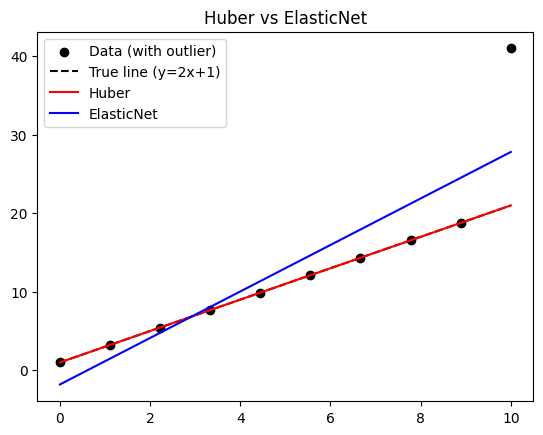

Huber Coefficients: [2.00001865] Intercept: 0.9998821904577078
ElasticNet Coefficients: [2.96236656] Intercept: -1.81183282069839


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, ElasticNet

# Data with an outlier
X = np.linspace(0, 10, 10).reshape(-1, 1)
y = 2 * X.ravel() + 1
y[-1] += 20  # inject a strong outlier

# ----- Huber -----
huber = HuberRegressor(epsilon=1.35, alpha=0.0, fit_intercept=True, max_iter=1000)
huber.fit(X, y)
y_pred_huber = huber.predict(X)

# ----- ElasticNet -----
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, fit_intercept=True, max_iter=1000)
elastic.fit(X, y)
y_pred_elastic = elastic.predict(X)

# ----- Plot -----
plt.scatter(X, y, color="black", label="Data (with outlier)")
plt.plot(X, 2 * X + 1, "k--", label="True line (y=2x+1)")
plt.plot(X, y_pred_huber, "r-", label="Huber")
plt.plot(X, y_pred_elastic, "b-", label="ElasticNet")
plt.legend()
plt.title("Huber vs ElasticNet")
plt.show()

# Print coefficients
print("Huber Coefficients:", huber.coef_, "Intercept:", huber.intercept_)
print("ElasticNet Coefficients:", elastic.coef_, "Intercept:", elastic.intercept_)

- **The Huber line fits the main trend.**
- **The ElasticNet line gets pulled toward the outlier.**